## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  85.902048  1614.266425  0.479638  2.370874  778.981953
1  90.975825   910.737891  0.805058  3.378536  738.989135
2  63.627831   631.701020  0.090683  5.453864   85.716823
3  86.922709  1687.088709  0.049764  2.581543  120.729769
4  16.671275  1477.431052  0.225613  5.295653  333.754668


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9182251	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9089275	total: 58.6ms	remaining: 29.2s
2:	learn: 0.8984443	total: 59.1ms	remaining: 19.7s
3:	learn: 0.8887744	total: 59.8ms	remaining: 14.9s
4:	learn: 0.8786118	total: 60.4ms	remaining: 12s
5:	learn: 0.8689740	total: 60.8ms	remaining: 10.1s
6:	learn: 0.8589401	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8489684	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8392338	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8294511	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8202481	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8087112	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8000375	total: 64.7ms	remaining: 4.91s
13:	learn: 0.7903633	total: 65.1ms	remaining: 4.58s
14:	learn: 0.7819923	total: 65.5ms	remaining: 4.3s
15:	learn: 0.7745012	total: 66ms	remaining: 4.06s
16:	learn: 0.7655696	total: 66.4ms	remaining: 3.84s
17:	learn: 0.7580144	total: 66.9ms	remaining: 3.65s
18:	learn: 0.7512841	total: 67.4ms	remaining: 3.48s

128:	learn: 0.2489199	total: 117ms	remaining: 787ms
129:	learn: 0.2470405	total: 117ms	remaining: 784ms
130:	learn: 0.2465404	total: 117ms	remaining: 778ms
131:	learn: 0.2449972	total: 118ms	remaining: 775ms
132:	learn: 0.2428954	total: 118ms	remaining: 772ms
133:	learn: 0.2408328	total: 119ms	remaining: 767ms
134:	learn: 0.2390316	total: 119ms	remaining: 763ms
135:	learn: 0.2372943	total: 120ms	remaining: 760ms
136:	learn: 0.2354668	total: 120ms	remaining: 755ms
137:	learn: 0.2336297	total: 120ms	remaining: 752ms
138:	learn: 0.2315834	total: 121ms	remaining: 749ms
139:	learn: 0.2289839	total: 121ms	remaining: 745ms
140:	learn: 0.2274609	total: 122ms	remaining: 742ms
141:	learn: 0.2255149	total: 122ms	remaining: 739ms
142:	learn: 0.2231259	total: 123ms	remaining: 735ms
143:	learn: 0.2206490	total: 123ms	remaining: 731ms
144:	learn: 0.2188322	total: 123ms	remaining: 728ms
145:	learn: 0.2168171	total: 124ms	remaining: 726ms
146:	learn: 0.2142415	total: 124ms	remaining: 721ms
147:	learn: 

285:	learn: 0.0774691	total: 185ms	remaining: 462ms
286:	learn: 0.0769398	total: 186ms	remaining: 461ms
287:	learn: 0.0767189	total: 186ms	remaining: 460ms
288:	learn: 0.0763953	total: 186ms	remaining: 459ms
289:	learn: 0.0757816	total: 187ms	remaining: 458ms
290:	learn: 0.0754422	total: 187ms	remaining: 457ms
291:	learn: 0.0748670	total: 188ms	remaining: 455ms
292:	learn: 0.0744349	total: 188ms	remaining: 454ms
293:	learn: 0.0741168	total: 189ms	remaining: 453ms
294:	learn: 0.0738276	total: 189ms	remaining: 452ms
295:	learn: 0.0734974	total: 189ms	remaining: 451ms
296:	learn: 0.0732444	total: 190ms	remaining: 449ms
297:	learn: 0.0729362	total: 190ms	remaining: 448ms
298:	learn: 0.0724019	total: 191ms	remaining: 447ms
299:	learn: 0.0721288	total: 191ms	remaining: 445ms
300:	learn: 0.0715836	total: 191ms	remaining: 444ms
301:	learn: 0.0712572	total: 192ms	remaining: 443ms
302:	learn: 0.0709549	total: 192ms	remaining: 442ms
303:	learn: 0.0706923	total: 192ms	remaining: 440ms
304:	learn: 

538:	learn: 0.0209238	total: 299ms	remaining: 256ms
539:	learn: 0.0207900	total: 300ms	remaining: 255ms
540:	learn: 0.0207590	total: 300ms	remaining: 254ms
541:	learn: 0.0207283	total: 300ms	remaining: 254ms
542:	learn: 0.0205882	total: 301ms	remaining: 253ms
543:	learn: 0.0204589	total: 301ms	remaining: 252ms
544:	learn: 0.0204291	total: 301ms	remaining: 252ms
545:	learn: 0.0202907	total: 302ms	remaining: 251ms
546:	learn: 0.0201788	total: 302ms	remaining: 250ms
547:	learn: 0.0200548	total: 303ms	remaining: 250ms
548:	learn: 0.0200263	total: 303ms	remaining: 249ms
549:	learn: 0.0199399	total: 303ms	remaining: 248ms
550:	learn: 0.0199120	total: 304ms	remaining: 248ms
551:	learn: 0.0198074	total: 304ms	remaining: 247ms
552:	learn: 0.0196759	total: 305ms	remaining: 246ms
553:	learn: 0.0195700	total: 305ms	remaining: 246ms
554:	learn: 0.0194424	total: 305ms	remaining: 245ms
555:	learn: 0.0194156	total: 306ms	remaining: 244ms
556:	learn: 0.0193892	total: 306ms	remaining: 244ms
557:	learn: 

700:	learn: 0.0110090	total: 367ms	remaining: 157ms
701:	learn: 0.0109884	total: 368ms	remaining: 156ms
702:	learn: 0.0109419	total: 368ms	remaining: 156ms
703:	learn: 0.0109222	total: 369ms	remaining: 155ms
704:	learn: 0.0108770	total: 369ms	remaining: 154ms
705:	learn: 0.0108579	total: 370ms	remaining: 154ms
706:	learn: 0.0108392	total: 370ms	remaining: 153ms
707:	learn: 0.0108084	total: 370ms	remaining: 153ms
708:	learn: 0.0107587	total: 371ms	remaining: 152ms
709:	learn: 0.0107286	total: 371ms	remaining: 152ms
710:	learn: 0.0106989	total: 372ms	remaining: 151ms
711:	learn: 0.0106796	total: 372ms	remaining: 151ms
712:	learn: 0.0106607	total: 373ms	remaining: 150ms
713:	learn: 0.0106420	total: 373ms	remaining: 149ms
714:	learn: 0.0106175	total: 374ms	remaining: 149ms
715:	learn: 0.0105992	total: 374ms	remaining: 148ms
716:	learn: 0.0105567	total: 374ms	remaining: 148ms
717:	learn: 0.0105152	total: 375ms	remaining: 147ms
718:	learn: 0.0104974	total: 375ms	remaining: 147ms
719:	learn: 

911:	learn: 0.0058557	total: 461ms	remaining: 44.4ms
912:	learn: 0.0058470	total: 461ms	remaining: 43.9ms
913:	learn: 0.0058364	total: 462ms	remaining: 43.4ms
914:	learn: 0.0058260	total: 462ms	remaining: 42.9ms
915:	learn: 0.0058036	total: 462ms	remaining: 42.4ms
916:	learn: 0.0057932	total: 463ms	remaining: 41.9ms
917:	learn: 0.0057712	total: 463ms	remaining: 41.4ms
918:	learn: 0.0057566	total: 464ms	remaining: 40.9ms
919:	learn: 0.0057422	total: 464ms	remaining: 40.3ms
920:	learn: 0.0057321	total: 464ms	remaining: 39.8ms
921:	learn: 0.0057180	total: 465ms	remaining: 39.3ms
922:	learn: 0.0057081	total: 465ms	remaining: 38.8ms
923:	learn: 0.0056943	total: 466ms	remaining: 38.3ms
924:	learn: 0.0056807	total: 466ms	remaining: 37.8ms
925:	learn: 0.0056710	total: 466ms	remaining: 37.3ms
926:	learn: 0.0056577	total: 467ms	remaining: 36.8ms
927:	learn: 0.0056482	total: 467ms	remaining: 36.3ms
928:	learn: 0.0056273	total: 468ms	remaining: 35.8ms
929:	learn: 0.0056143	total: 468ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


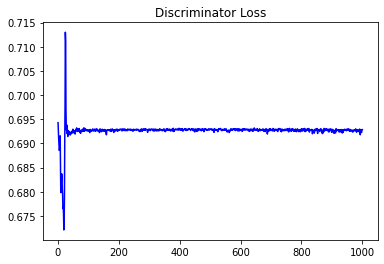

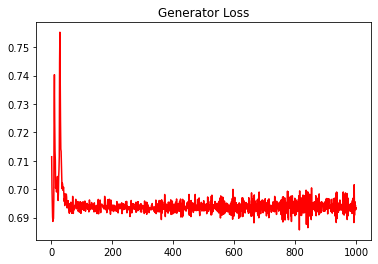

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009351253565829958


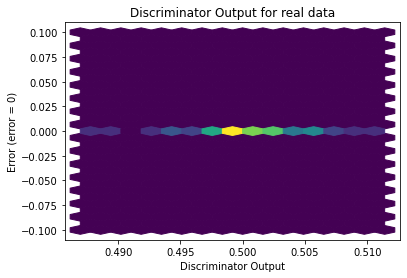

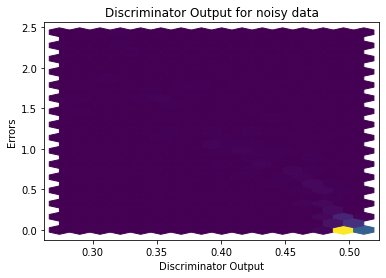

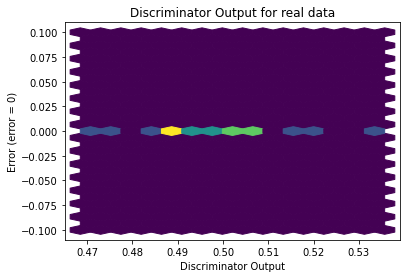

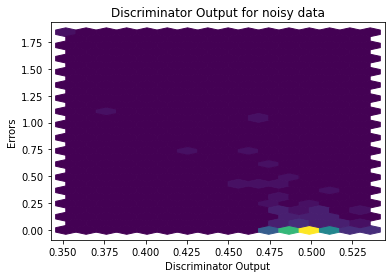

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8068]], requires_grad=True)
